<a href="https://colab.research.google.com/github/Maxhzrz/Tarea_diplomado/blob/main/Evaluacion_1_mineria_de_datos_uc_r%26m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
## Carga de archivos
paises <- read.csv(file= "https://raw.githubusercontent.com/Maxhzrz/Tarea_diplomado/main/DatosPaises.csv",sep=";")
library(dplyr)
head(paises)
install.packages('ggplot2')
install.packages('patchwork')




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,PAIS,PIB,POB,IDH,GINI,IPC,FAO,GENERO,ELECTRICIDAD,ESCOLARIDAD,⋯,TURISMO,INTERNET,VIOLENCIA,VIDA,CELULAR,DESERCION,PRISION,RENOVABLE,PARLAMENTO,INMIGRANTES
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Qatar,127.54265,2.169,0.8498,29.95,107.07,1.75,0.524,98,13.79,⋯,2.611,91.49,38.3,78.2,145.76,2.26,60,0.00,0.00,73.82
2,Luxembourg,87.77164,0.543,0.8919,29.00,108.01,1.27,0.100,100,13.88,⋯,0.945,94.67,39.5,81.7,148.37,5.60,122,3.98,28.33,43.25
3,Kuwait,82.36923,3.250,0.8163,29.00,111.19,2.60,0.387,98,14.75,⋯,0.300,78.70,39.5,74.4,218.43,5.93,137,0.00,1.54,60.21
4,Singapore,76.24004,5.399,0.9118,29.95,112.65,1.02,0.088,100,15.40,⋯,11.900,82.00,9.2,83.0,158.13,1.32,230,2.79,25.25,42.93
5,Brunei,69.44976,0.418,0.8556,29.00,102.88,2.95,0.064,76,14.53,⋯,0.225,68.77,39.5,78.8,110.06,3.63,122,0.00,23.17,49.35
6,Norway,62.45083,5.084,0.9439,26.83,104.19,1.51,0.067,100,17.49,⋯,4.963,96.30,26.8,81.6,116.51,1.51,72,47.75,39.64,13.77


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
library(patchwork)
library(ggplot2)

In [84]:
install.packages('psych')
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [9]:
# Se elige POB, IDH, ESCOLARIDAD, Coef de GINI (Indice de desigualdad)

summary(paises[c("POB","IDH","ESCOLARIDAD","GINI")])

      POB                IDH          ESCOLARIDAD         GINI      
 Min.   :   0.021   Min.   :0.3483   Min.   : 4.10   Min.   :24.82  
 1st Qu.:   2.154   1st Qu.:0.5738   1st Qu.:11.09   1st Qu.:31.01  
 Median :   8.153   Median :0.7241   Median :13.07   Median :36.75  
 Mean   :  37.205   Mean   :0.6924   Mean   :12.88   Mean   :38.29  
 3rd Qu.:  23.450   3rd Qu.:0.8166   3rd Qu.:15.03   3rd Qu.:43.22  
 Max.   :1357.380   Max.   :0.9439   Max.   :20.22   Max.   :65.77  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


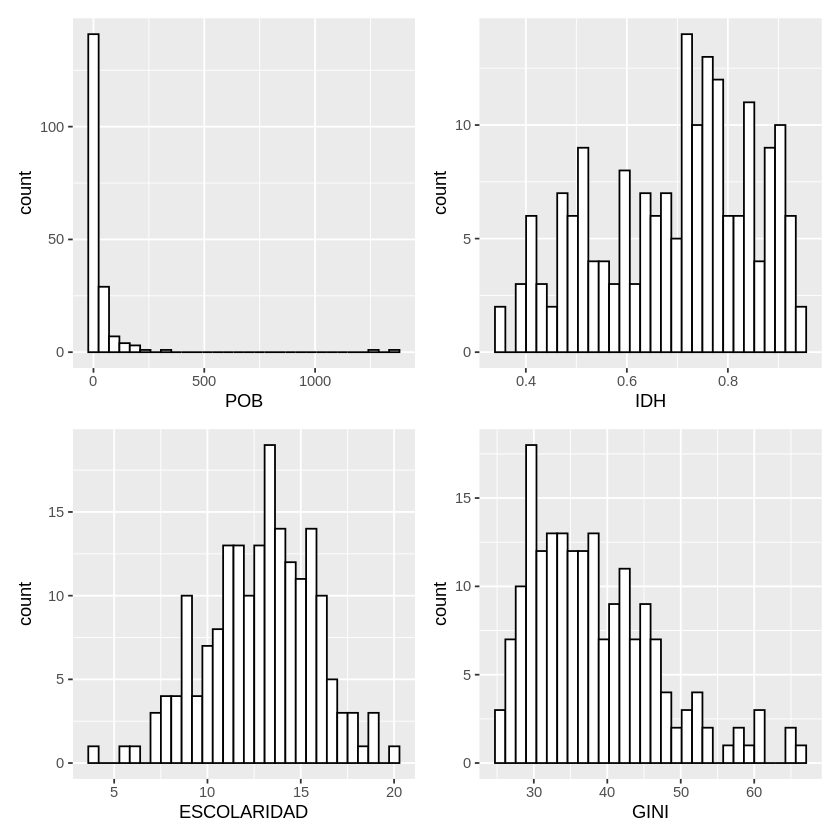

In [13]:
h1<- ggplot(paises, aes(x=POB)) +
  geom_histogram(color="black", fill="white")
h2<- ggplot(paises, aes(x=IDH)) +
  geom_histogram(color="black", fill="white")
h3<- ggplot(paises, aes(x=ESCOLARIDAD)) +
  geom_histogram(color="black", fill="white")
h4<- ggplot(paises, aes(x=GINI)) +
  geom_histogram(color="black", fill="white")
  h1+h2+h3+h4


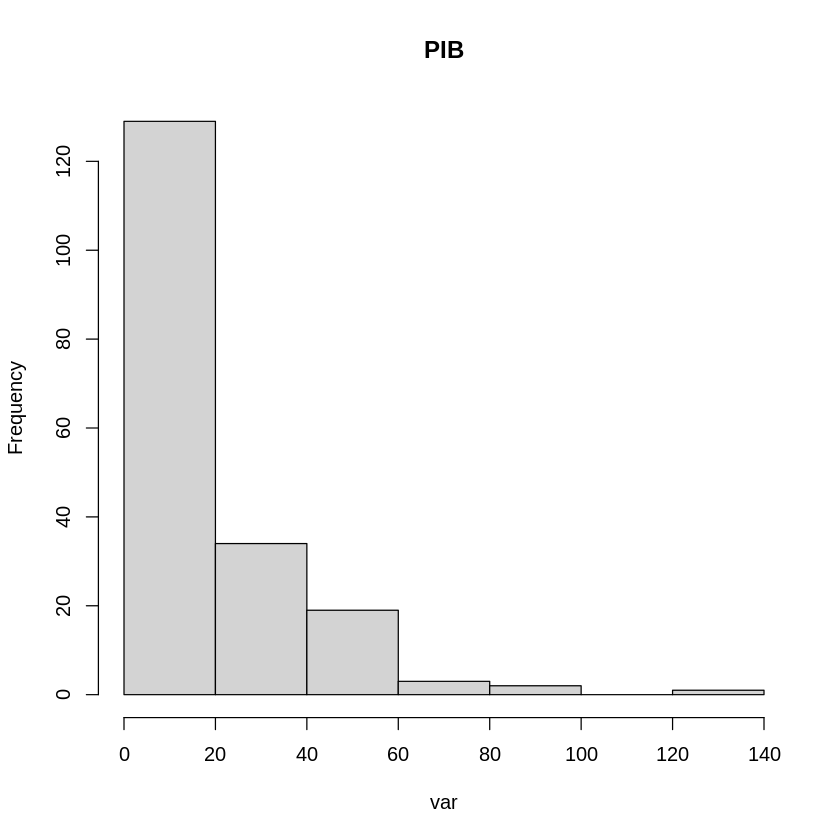

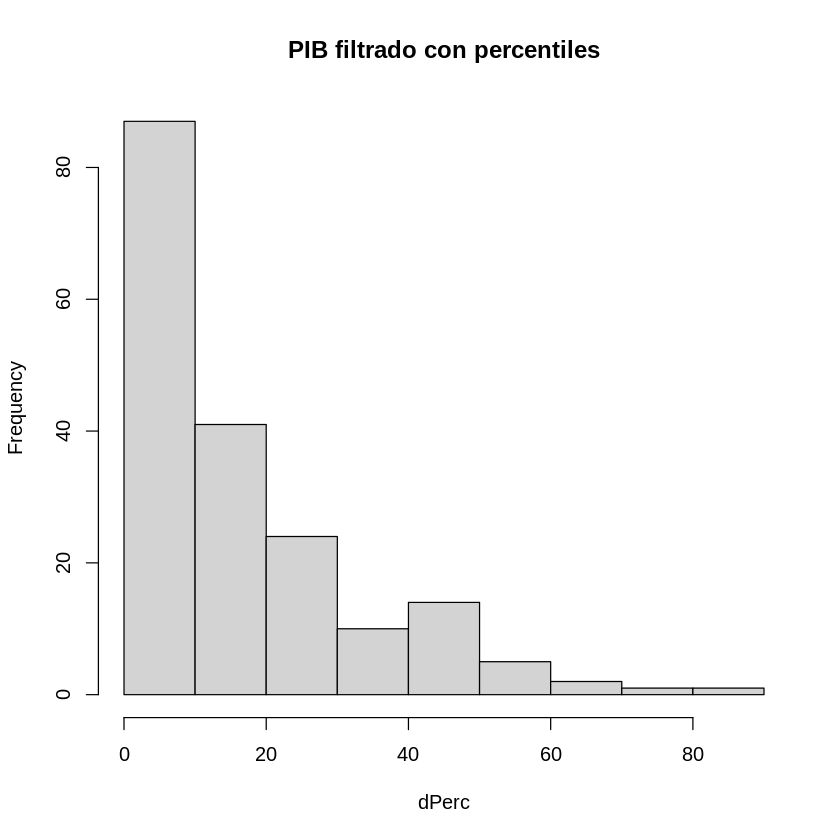

ERROR: ignored

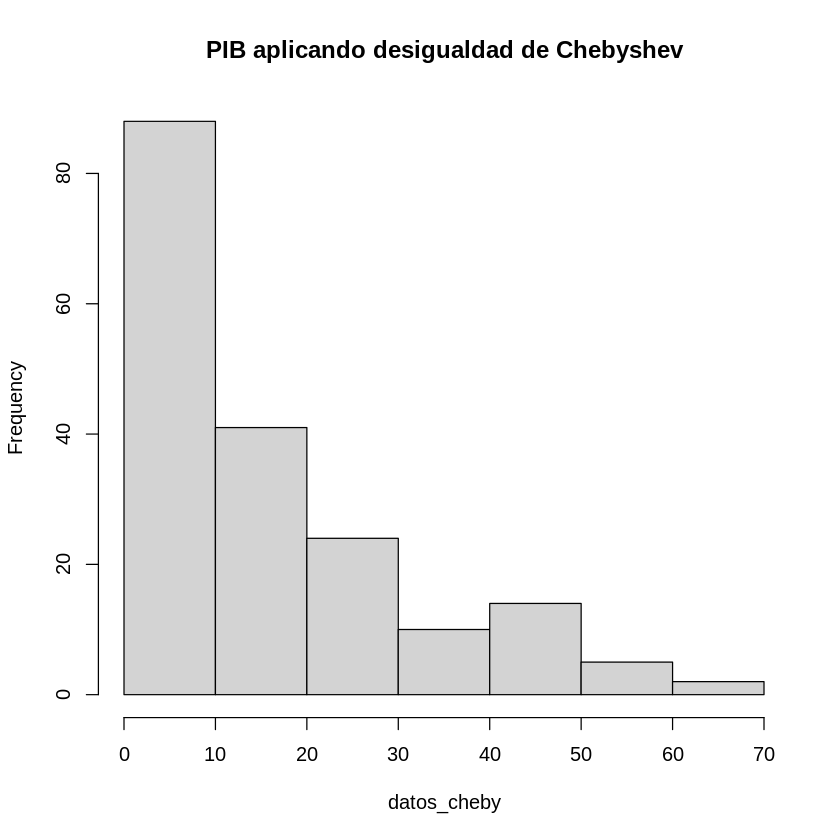

In [14]:
# PIB

var<-paises$PIB
hist(var,main="PIB")
# Método 1 - Percentiles
Perc<- quantile(var, prob=seq(0, 1, length = 101))
#P_PIB[100]
dPerc<-var[var<Perc[100] & var>Perc[1]]
hist(dPerc, main="PIB filtrado con percentiles")
prop_perc<-length(dPerc)/length(var)
#Método 2 - Desigualdad de Chevyshev
  # Define el valor de k
  k <- 3
  # Calcula la media y la desviación estándar
  mean <- mean(var)
  sd <- sd(var)

  # Calcula el número de datos dentro de k desviaciones estándar de la media
  in_range <- sum(abs(var - mean) <= k * sd)

  # Chebyshev's inequality theoretical lower bound
  chebyshev_bound <- 1 - 1 / k^2

datos_cheby<- var[(abs(var - mean) <= k * sd)]
#prop_cheby<-length(datos_cheby)/length(var)
hist(datos_cheby, main="PIB aplicando desigualdad de Chebyshev")
#print(prop_perc)
print(prop_cheby)
#Método 3 - Z Robusto
#define funcion
robust_z <- function(x) {
  median_x <- median(x)
  mad_x <- mad(x)
  z <- (x - median_x) / mad_x
  return(z)
}
# se aplica al dataframe
df<- as.data.frame(data.frame(var))
df$zrob<-  robust_z(var)
df_filtered <- df[abs(df$zrob) <= 5,]
hist(df_filtered$var, main="PIB utilizando Z-Robusto")
prop_zrob<-length(df_filtered$var)/length(var)
print(prop_zrob)
#print(prop_cheby)


hist(df$zrob, main="Valores Z del PIB")

In [15]:
mean(Perc[1:100])
sd(df$zrob)
sd(var)
summary(datos_cheby)

[1] 16.35292

ERROR: ignored

99% 
437.8104

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


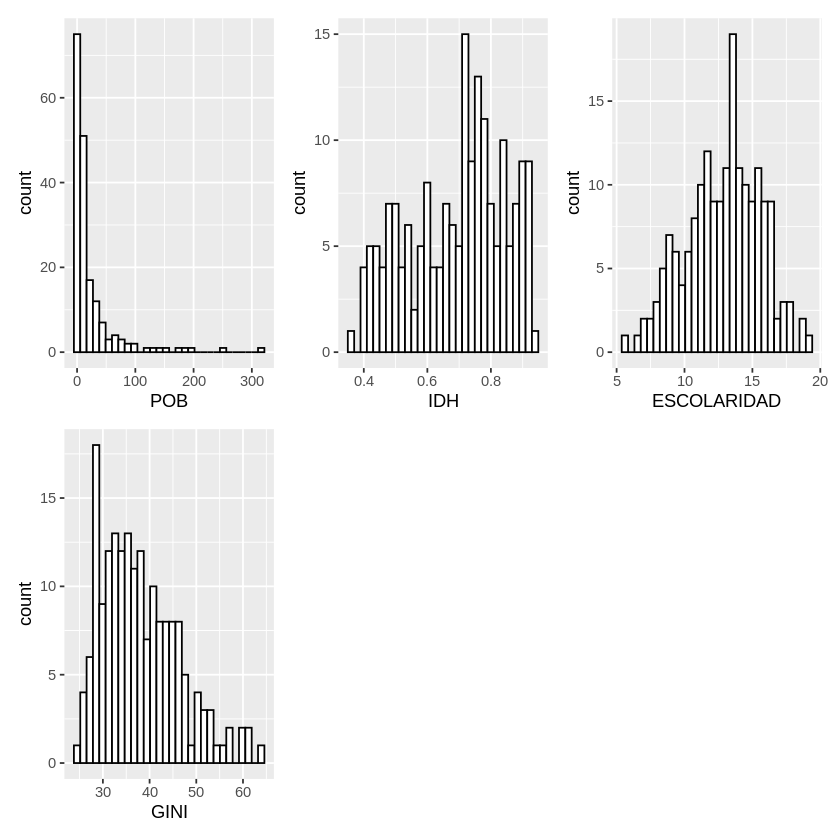

In [130]:
# Método 1

#POB
var<-paises$POB
# Método 1 - Percentiles
Perc<- quantile(var, prob=seq(0, 1, length = 101))
Perc[100]
dPerc<-var[var<Perc[100] & var>Perc[1]]

prop_perc<-length(dPerc)/length(var)
sdPob<-sd(dPerc)
h1<- ggplot(data.frame(POB = dPerc), aes(x=POB)) +
  geom_histogram(color="black", fill="white")

 #IDH
var<-paises$IDH
# Método 1 - Percentiles
Perc<- quantile(var, prob=seq(0, 1, length = 101))
dPerc<-var[var<Perc[100] & var>Perc[1]]
prop_perc<-length(dPerc)/length(var)
sdIDH<-sd(dPerc)
h2<- ggplot(data.frame(IDH = dPerc), aes(x=IDH)) +
  geom_histogram(color="black", fill="white")

#ESCOLARIDAD
var<-paises$ESCOLARIDAD
# Método 1 - Percentiles
Perc<- quantile(var, prob=seq(0, 1, length = 101))
dPerc<-var[var<Perc[100] & var>Perc[1]]
#Perc[100]
prop_perc<-length(dPerc)/length(var)
sdEscolaridad<-sd(dPerc)
h3<- ggplot(data.frame(ESCOLARIDAD = dPerc), aes(x=ESCOLARIDAD)) +
  geom_histogram(color="black", fill="white")

#GINI
var<-paises$GINI
# Método 1 - Percentiles
Perc<- quantile(var, prob=seq(0, 1, length = 101))
dPerc<-var[var<Perc[100] & var>Perc[1]]
#Perc[100]
dPerc<-var[var<Perc[100] & var>Perc[1]]
prop_perc<-length(dPerc)/length(var)
sdGINI<-sd(dPerc)
h4<- ggplot(data.frame(GINI = dPerc), aes(x=GINI)) +
  geom_histogram(color="black", fill="white")

h1+h2+h3+h4 + plot_layout(ncol = 3)




[1] 0.9893617
[1] 1
[1] 0.9946809
[1] 0.9893617


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


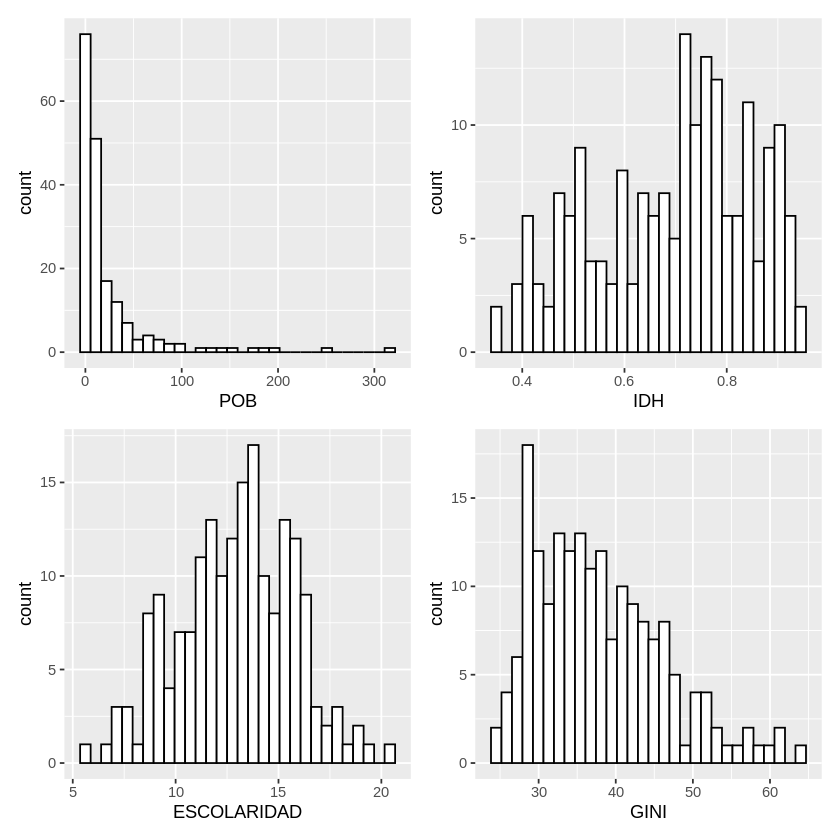

In [136]:
var<-paises$POB
#Método 2 - Desigualdad de Chevyshev
  # Define el valor de k
  k <- 3
  # Calcula la media y la desviación estándar
  mean <- mean(var)
  sd <- sd(var)

  # Calcula el número de datos dentro de k desviaciones estándar de la media
  in_range <- sum(abs(var - mean) <= k * sd)

  # Chebyshev's inequality theoretical lower bound
  chebyshev_bound <- 1 - 1 / k^2

datos_cheby<- var[(abs(var - mean) <= k * sd)]
prop_cheby<-length(datos_cheby)/length(var)

#print(prop_perc)
print(prop_cheby)

h1<- ggplot(data.frame(POB = datos_cheby), aes(x=POB)) +
  geom_histogram(color="black", fill="white")

 var<-paises$IDH
#Método 2 - Desigualdad de Chevyshev
  # Define el valor de k
  k <- 3
  # Calcula la media y la desviación estándar
  mean <- mean(var)
  sd <- sd(var)

  # Calcula el número de datos dentro de k desviaciones estándar de la media
  in_range <- sum(abs(var - mean) <= k * sd)

  # Chebyshev's inequality theoretical lower bound
  chebyshev_bound <- 1 - 1 / k^2

datos_cheby<- var[(abs(var - mean) <= k * sd)]
prop_cheby<-length(datos_cheby)/length(var)

#print(prop_perc)
print(prop_cheby)

h2<- ggplot(data.frame(IDH = datos_cheby), aes(x=IDH)) +
  geom_histogram(color="black", fill="white")
############

var<-paises$ESCOLARIDAD
#Método 2 - Desigualdad de Chevyshev
  # Define el valor de k
  k <- 3
  # Calcula la media y la desviación estándar
  mean <- mean(var)
  sd <- sd(var)

  # Calcula el número de datos dentro de k desviaciones estándar de la media
  in_range <- sum(abs(var - mean) <= k * sd)

  # Chebyshev's inequality theoretical lower bound
  chebyshev_bound <- 1 - 1 / k^2

datos_cheby<- var[(abs(var - mean) <= k * sd)]
prop_cheby<-length(datos_cheby)/length(var)

#print(prop_perc)
print(prop_cheby)

h3<- ggplot(data.frame(ESCOLARIDAD = datos_cheby), aes(x=ESCOLARIDAD)) +
  geom_histogram(color="black", fill="white")

############

var<-paises$GINI
#Método 2 - Desigualdad de Chevyshev
  # Define el valor de k
  k <- 3
  # Calcula la media y la desviación estándar
  mean <- mean(var)
  sd <- sd(var)

  # Calcula el número de datos dentro de k desviaciones estándar de la media
  in_range <- sum(abs(var - mean) <= k * sd)

  # Chebyshev's inequality theoretical lower bound
  chebyshev_bound <- 1 - 1 / k^2

datos_cheby<- var[(abs(var - mean) <= k * sd)]
prop_cheby<-length(datos_cheby)/length(var)

#print(prop_perc)
print(prop_cheby)

h4<- ggplot(data.frame(GINI = datos_cheby), aes(x=GINI)) +
  geom_histogram(color="black", fill="white")

   h1+h2+h3+h4

In [155]:

robust_z <- function(x) {
  median_x <- median(x)
  mad_x <- mad(x)
  z <- (x - median_x) / mad_x
  return(z)
}
# se aplica al dataframe
var<-paises$POB
df<- as.data.frame(data.frame(var))
df$zrob<-  robust_z(var)
df_filtered <- df[abs(df$zrob) <= 3,]
df_filteredPOB<-df[abs(df$zrob) <= 3,]
prop_zrob_POB<-length(df_filtered$var)/length(var)
print(prop_zrob)
#print(prop_cheby)

h1<- ggplot(data.frame(POB = df_filtered$var), aes(x=POB)) +
  geom_histogram(color="black", fill="white")
z1<- ggplot(data.frame(POB = df$zrob), aes(x=POB)) +
  geom_histogram(color="black", fill="white")

 # se aplica al dataframe
var<-paises$IDH
df<- as.data.frame(data.frame(var))
df$zrob<-  robust_z(var)
df_filtered <- df[abs(df$zrob) <= 3,]
df_filteredIDH<-df[abs(df$zrob) <= 3,]
prop_zrob_IDH<-length(df_filtered$var)/length(var)
print(prop_zrob)
#print(prop_cheby)

h2<- ggplot(data.frame(IDH = df_filtered$var), aes(x=IDH)) +
  geom_histogram(color="black", fill="white")
z2<- ggplot(data.frame(IDH = df$zrob), aes(x=IDH)) +
  geom_histogram(color="black", fill="white")
# se aplica al dataframe
var<-paises$ESCOLARIDAD
df<- as.data.frame(data.frame(var))
df$zrob<-  robust_z(var)
df_filtered <- df[abs(df$zrob) <= 3,]
df_filteredESC<-df[abs(df$zrob) <= 3,]
prop_zrob_ESC<-length(df_filtered$var)/length(var)
print(prop_zrob)
#print(prop_cheby)

h3<- ggplot(data.frame(ESCOLARIDAD = df_filtered$var), aes(x=ESCOLARIDAD)) +
  geom_histogram(color="black", fill="white")
z3<- ggplot(data.frame(ESCOLARIDAD = df$zrob), aes(x=ESCOLARIDAD)) +
  geom_histogram(color="black", fill="white")
# se aplica al dataframe
var<-paises$GINI

df<- as.data.frame(data.frame(var))
df$zrob<-  robust_z(var)
df_filtered <- df[abs(df$zrob) <= 3,]
df_filteredGINI<-df[abs(df$zrob) <= 3,]
prop_zrob_GINI<-length(df_filtered$var)/length(var)
print(prop_zrob)
#print(prop_cheby)

h4<- ggplot(data.frame(GINI = df_filtered$var), aes(x=GINI)) +
  geom_histogram(color="black", fill="white")
z4<- ggplot(data.frame(GINI = df$zrob), aes(x=GINI)) +
  geom_histogram(color="black", fill="white")

paste("GINI:",sd(df_filteredGINI))
paste("ESC:",sd(df_filteredESC))
paste("IDH:",sd(df_filteredIDH))
paste("POB:",sd(df_filteredPOB))

   #h1+h2+h3+h4

   #z1+z2+z3+z4

[1] 0.9840426
[1] 0.9840426
[1] 0.9840426
[1] 0.9840426


ERROR: ignored